In [160]:
#importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import funcoes
import numpy as np


In [161]:
#importando dataset já com as colunas selecionadas
df = pd.read_csv(r"AB_NYC_2019.csv", usecols=[0,2,4,5,6,7,8,9,10,11,14,15])

In [210]:
display(df.head())

df.columns

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,is_open
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,True
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,True
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,True
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,True
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,True


Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'is_open'],
      dtype='object')

In [185]:
#Alteração do tipo das variavéis de id
df.id = df.id.astype(str)
df.host_id = df.host_id.astype(str)
df.dtypes

id                                 object
host_id                            object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
is_open                              bool
dtype: object

In [195]:
#estatística principais das variavéis númerica
df.iloc[:,6:].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,31362.000000,31362.000000,31362.000000,31362.000000,31362.000000
mean,162.050475,8.338658,31.852369,10.334067,175.831994
std,254.425463,23.836703,51.636804,40.700398,126.187636
min,0.000000,1.000000,0.000000,1.000000,1.000000
25%,70.000000,2.000000,2.000000,1.000000,55.000000
50%,111.500000,3.000000,10.000000,1.000000,168.000000
75%,189.000000,5.000000,39.000000,3.000000,305.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [164]:
#dataset com exclusão das hospedagem sem disponibilidade
df["is_open"] =  list(map(lambda x : x!=0, df["availability_365"]))
df_base = df.copy()
df = df.loc[df["is_open"] == True]
display(df.head())

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,is_open
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365,True
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,True
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365,True
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,True
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,1,129,True


In [167]:
#Acomodações sem disponibilidade de reservas 
df_base["is_open"].value_counts()

is_open
True     31362
False    17533
Name: count, dtype: int64

In [197]:
#dataset agrupado por bairro
df_bairro = df.groupby(["neighbourhood_group","neighbourhood","room_type"]).agg({"price":"mean","id":"count","number_of_reviews":"sum"}).reset_index()
df_bairro.rename(columns={"price":"price_average","id":"qtd_id"}, inplace=True)
df_bairro.sort_values(by=["price_average","room_type","neighbourhood"], inplace=True)
display(df_bairro.head())

,neighbourhood_group,neighbourhood,room_type,price_average,qtd_id,number_of_reviews
496,Staten Island,Randall Manor,Shared room,13.0,1,9
469,Staten Island,Graniteville,Private room,20.0,1,80
76,Bronx,Pelham Gardens,Shared room,20.0,1,0
85,Bronx,Schuylerville,Shared room,20.0,1,116
101,Bronx,Van Nest,Shared room,20.0,3,6


In [199]:
#dataset agrupado por distrito
df_distrito = df.groupby(["neighbourhood_group","room_type"]).agg({"price":"mean","id":"count","number_of_reviews":"sum"}).reset_index()
df_distrito.rename(columns={"price":"price_average","id":"qtd_id"}, inplace=True)
df_distrito["percentual"] = round((df_distrito["qtd_id"] / df_distrito["qtd_id"].sum())*100 , 2)
display(df_distrito.head())

,neighbourhood_group,room_type,price_average,qtd_id,number_of_reviews,percentual
0,Bronx,Entire home/apt,131.682390,318,11209,1.01
1,Bronx,Private room,66.699634,546,14977,1.74
2,Bronx,Shared room,61.200000,50,396,0.16
3,Brooklyn,Entire home/apt,187.711133,6072,238759,19.36
4,Brooklyn,Private room,80.701190,5880,181852,18.75


Text(0, 0.5, 'Opções de Locações')

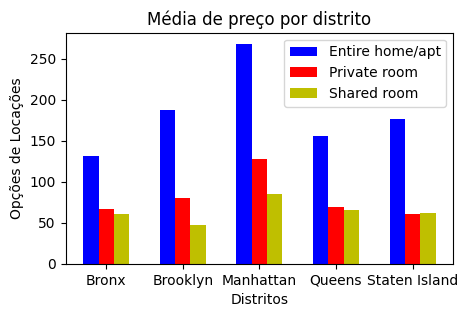

In [169]:
#Gráfico de preço médio por distrito e com divisão do tipo de instalagem 
x = np.arange(5) 
y1 = np.array(df_distrito.loc[df_distrito["room_type"] == "Entire home/apt"]["price"])
y2 = np.array(df_distrito.loc[df_distrito["room_type"] == "Private room"]["price"])
y3 = np.array(df_distrito.loc[df_distrito["room_type"] == "Shared room"]["price"])
width = 0.2

fig = plt.figure(figsize = (5,3))
plt.bar(x-0.2, y1, width, color = "b")
plt.bar(x, y2, width, color = "r")
plt.bar(x+0.2, y3, width, color = "y")
plt.xticks(x, df_distrito["neighbourhood_group"].unique())
plt.legend(["Entire home/apt","Private room","Shared room"])
plt.title("Média de preço por distrito")
plt.xlabel("Distritos")
plt.ylabel("Opções de Locações")

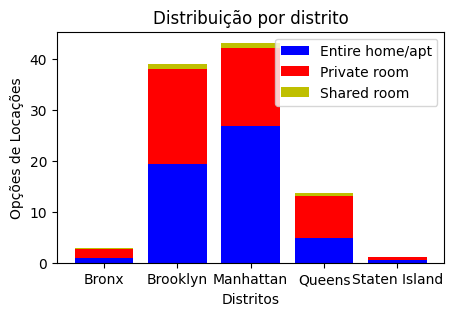

In [170]:
#Gráfico de disponibilidade por distrito com divisão do tipo de instalagem 
x = df_distrito["neighbourhood_group"].unique()
y1 = np.array(df_distrito.loc[df_distrito["room_type"] == "Entire home/apt"]["percentual"])
y2 = np.array(df_distrito.loc[df_distrito["room_type"] == "Private room"]["percentual"])
y3 = np.array(df_distrito.loc[df_distrito["room_type"] == "Shared room"]["percentual"])

fig = plt.figure(figsize = (5,3))
plt.bar(x, y1, color = "b")
plt.bar(x, y2, bottom = y1, color = "r")
plt.bar(x, y3, bottom = y1+y2, color = "y")
plt.title("Distribuição por distrito")
plt.xlabel("Distritos")
plt.ylabel("Opções de Locações")
plt.legend(["Entire home/apt","Private room","Shared room"])

plt.show()

In [171]:
#Tabela de distribuição de frequência com classe de intervalos para a quantidade de opções por host
df_host = df[["host_id","calculated_host_listings_count"]].drop_duplicates()
tab_dist = funcoes.tab_dist(df_host["calculated_host_listings_count"])
tab_dist.loc[tab_dist["Frequência"] != 0].iloc[:,:-1]

,Intervalo de Classe,Frequência,Frequência Relativa (%)
0,"[0, 10)",21696,99.481865
1,"[10, 20)",73,0.334724
2,"[20, 30)",13,0.059608
3,"[30, 40)",11,0.050438
4,"[40, 50)",4,0.018341
5,"[50, 60)",3,0.013756
6,"[60, 70)",1,0.004585
8,"[80, 90)",1,0.004585
9,"[90, 100)",3,0.013756
10,"[100, 110)",1,0.004585


In [172]:
#Faturamento do host por carteira de acomodações 
df_host = df.groupby(["host_id", "neighbourhood_group"]).agg({"id":"count","price":"sum"}).sort_values(by=["price"], ascending=False).reset_index()
df_host.rename(columns={"id":"nro_acomodações","price":"faturamento"}, inplace=True)
df_host

,host_id,neighbourhood_group,nro_acomodações,faturamento
0,219517861,Manhattan,327,82795
1,107434423,Manhattan,230,69741
2,205031545,Manhattan,49,35294
3,30283594,Manhattan,121,33581
4,156158778,Manhattan,6,26071
...,...,...,...,...
21876,197169969,Queens,1,10
21877,205820814,Bronx,1,10
21878,97001292,Queens,1,10
21879,167570251,Brooklyn,1,10


In [201]:
#Quantidade de host por distrito
df_id = df_host.groupby(["neighbourhood_group"]).agg({"host_id":"count"}).sort_values(by=["host_id"], ascending=False).reset_index()
df_id.rename(columns={"host_id":"total_host"})
df_id

,neighbourhood_group,host_id
0,Manhattan,9188
1,Brooklyn,9013
2,Queens,2820
3,Bronx,639
4,Staten Island,221


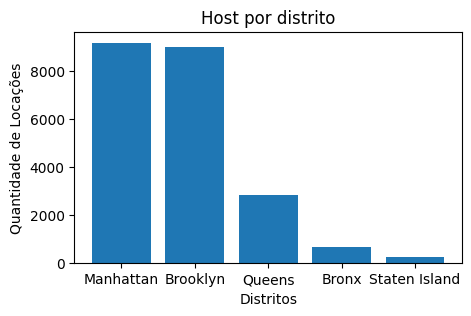

In [207]:
#Gráfico para quantidade de host por distrito
fig = plt.figure(figsize = (5,3))
plt.bar(df_id["neighbourhood_group"], df_id["host_id"])
plt.title("Host por distrito")
plt.xlabel("Distritos")
plt.ylabel("Quantidade de Locações")
plt.show()

In [174]:
#Média das estadias por distrito e tipo de hospedagem
df_estadia = df.groupby(["neighbourhood_group", "room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
df_estadia.rename(columns={"price":"price_mean","minimum_nights":"minimum_nights_mean"}, inplace=True)
df_estadia

,neighbourhood_group,room_type,minimum_nights_mean,price_mean
0,Bronx,Entire home/apt,6.295597,131.682390
1,Bronx,Private room,4.117216,66.699634
2,Bronx,Shared room,3.800000,61.200000
3,Brooklyn,Entire home/apt,7.364460,187.711133
4,Brooklyn,Private room,6.468027,80.701190
5,Brooklyn,Shared room,8.525974,46.964286
6,Manhattan,Entire home/apt,13.575643,268.215614
7,Manhattan,Private room,6.345253,127.971560
8,Manhattan,Shared room,7.857143,84.517857
9,Queens,Entire home/apt,5.769032,155.343871


In [175]:
#Média das estadias por distrito e tipo de hospedagem
df_estadia = df.groupby(["availability_365", "neighbourhood_group","room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
df_estadia

,availability_365,neighbourhood_group,room_type,minimum_nights,price
0,1,Bronx,Entire home/apt,1.250000,173.500000
1,1,Bronx,Private room,2.250000,50.250000
2,1,Brooklyn,Entire home/apt,8.294118,157.362745
3,1,Brooklyn,Private room,5.689655,64.775862
4,1,Brooklyn,Shared room,1.750000,46.000000
...,...,...,...,...,...
3226,365,Queens,Entire home/apt,26.292683,348.073171
3227,365,Queens,Private room,4.948148,99.362963
3228,365,Queens,Shared room,7.428571,63.750000
3229,365,Staten Island,Entire home/apt,4.500000,495.000000


In [176]:
#Tabela de distribuição de frequência com classe de intervalos para a quantidade de opções por host
df_estadia = df.groupby(["availability_365", "neighbourhood_group","room_type"]).agg({"minimum_nights":"mean", "price":"mean"}).reset_index()
tab_dist = funcoes.tab_dist(df_estadia["availability_365"])
tab_dist = tab_dist.loc[tab_dist["Frequência"] != 0].iloc[:,:-1]


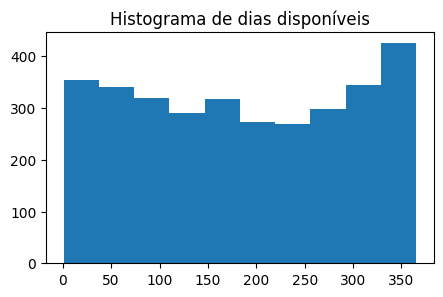

In [177]:
# Gráfico de histograma da distribuição de dias disponivéis
fig = plt.figure(figsize = (5,3))
plt.hist(df_estadia["availability_365"], bins = 10)
plt.title("Histograma de dias disponíveis")
plt.show()

In [178]:
#Correlações para variaveis númericas
df_cor = df.astype({"id":"str","host_id":str})
df_cor = df_cor.select_dtypes(exclude = ["object","bool"])
df_cor.corr().style.background_gradient(cmap = "Blues")

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
latitude,1.000000,0.078610,0.033803,0.035607,-0.013481,0.025341,-0.003714
longitude,0.078610,1.000000,-0.158940,-0.081527,0.033989,-0.146085,0.027964
price,0.033803,-0.158940,1.000000,0.039449,-0.072919,0.060828,0.074509
minimum_nights,0.035607,-0.081527,0.039449,1.000000,-0.116086,0.124207,0.125418
number_of_reviews,-0.013481,0.033989,-0.072919,-0.116086,1.000000,-0.115415,0.009881
calculated_host_listings_count,0.025341,-0.146085,0.060828,0.124207,-0.115415,1.000000,0.187949
availability_365,-0.003714,0.027964,0.074509,0.125418,0.009881,0.187949,1.000000


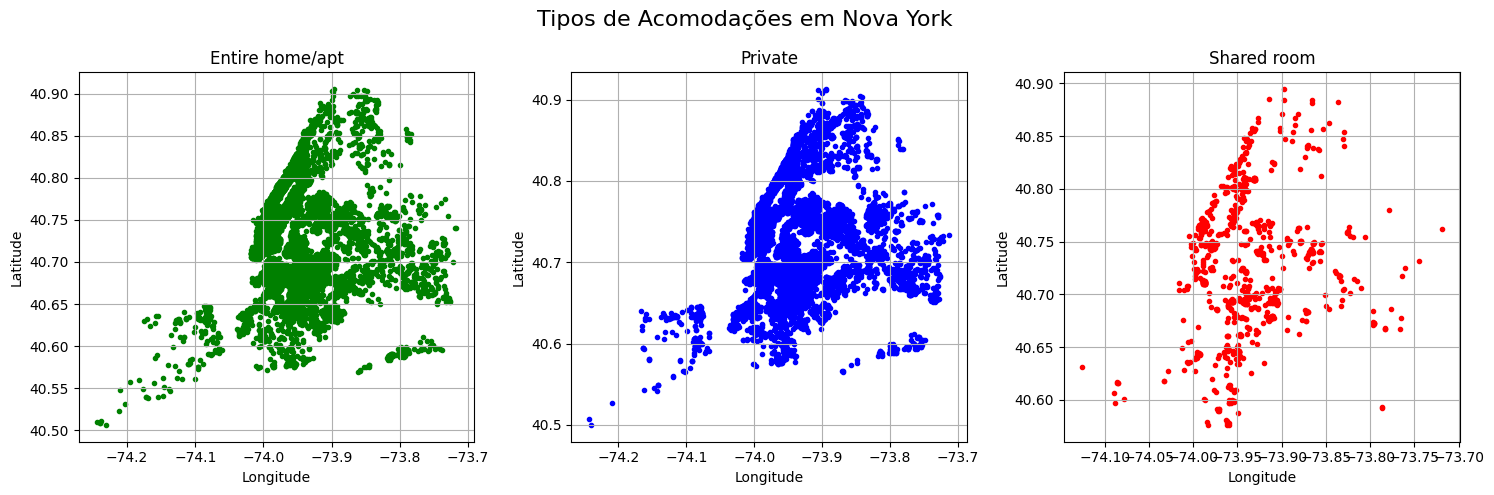

In [179]:
# Configurações do gráfico
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Adicionar título ao canvas
fig.suptitle('Tipos de Acomodações em Nova York', fontsize=16)

# Plotar os pontos no gráfico - Entire home/apt
longitudes_entire = df["longitude"].loc[df["room_type"] == "Entire home/apt"]
latitudes_entire = df["latitude"].loc[df["room_type"] == "Entire home/apt"]
axs[0].scatter(longitudes_entire, latitudes_entire, color='g', marker = ".")
axs[0].set_title('Entire home/apt')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')
axs[0].grid(True)

# Plotar os pontos no gráfico - Private
longitudes_private = df["longitude"].loc[df["room_type"] == "Private room"]
latitudes_private = df["latitude"].loc[df["room_type"] == "Private room"]
axs[1].scatter(longitudes_private, latitudes_private, color='b', marker = ".")
axs[1].set_title('Private')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')
axs[1].grid(True)

# Plotar os pontos no gráfico - Shared room
longitudes_shared = df["longitude"].loc[df["room_type"] == "Shared room"]
latitudes_shared = df["latitude"].loc[df["room_type"] == "Shared room"]
axs[2].scatter(longitudes_shared, latitudes_shared, color='r', marker = ".")
axs[2].set_title('Shared room')
axs[2].set_xlabel('Longitude')
axs[2].set_ylabel('Latitude')
axs[2].grid(True)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [83]:
import numpy as np
b = [167240, 149300, 220000, 159500, 128500, 120000, 159895, 79500, 79900, 312500, 141000, 136000, 178000, 119750, 139500, 96500, 191000, 176000, 122500, 186700]
a = [13, 25, 15, 19, 12, 20, 23, 14, 11, 12, 13, 16, 25, 22, 16]
media = sum(a)/15
media


17.066666666666666

In [90]:

lista = []
for i in range(len(a)):
    j = np.power(a[i]-media,2)   
    lista.append(j)

In [91]:
std_amostral = np.std(a, ddof=1)
std_amostral

4.891197146283262

In [94]:
(media - 14.5) / (std_amostral/np.sqrt(15))

2.032356692639028